##Qs 1

Multiclass Logistic Regression Implement Multiclass Logistic Regression (step-by-
step) on Iris dataset using one vs. rest strategy?

In [ ]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
dataset = load_iris()
X = dataset.data
y = dataset.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2)


In [ ]:
model = OneVsRestClassifier(SVC())
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [ ]:
print("Test Set Accuracy :",accuracy_score(
    y_test, prediction) * 100,end = '\n\n')
print("Classification Report :",classification_report(
    y_test, prediction),end = "\n\n")

Test Set Accuracy : 96.66666666666667

Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30




##Qs2 
Ridge Logistic Regression Download the exam dataset from the following link:
https://drive.google.com/file/d/1wH6ofvNGPmORFlCLt72WGhJYPZiXstYh/view
?usp=sharing
The dataset labels that whether or not the student will get admission on the basis of
the two exam scores. The plot of the data against exam1 and exam2

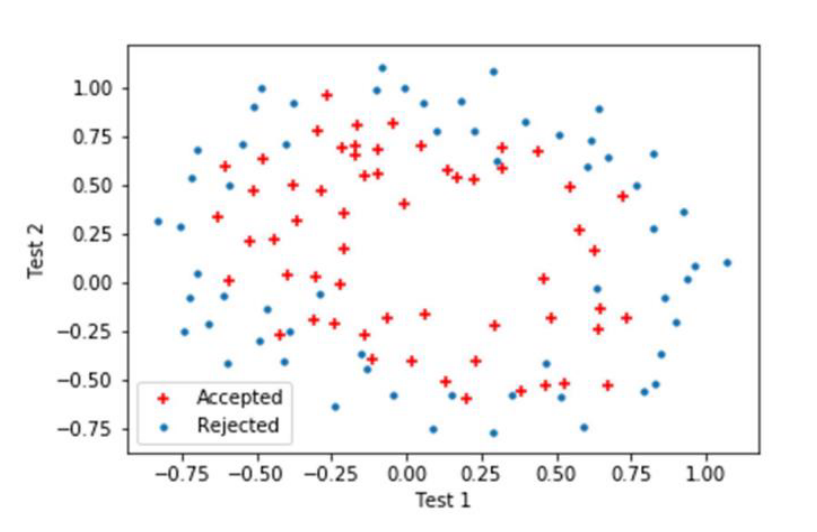

As clear from the figure, a linear decision boundary does not fit well. So, fit a Logistic
Regression Classifier with polynomial function of test1 and test2 scores upto degree
6 using
i. Step-by-Step Logistic Regression (with no regularization; alpha=10; number
of iterations=1000)
ii. Step-by-Step Logistic Regression (with ridge regularization; alpha=10;
number of iterations=1000; lambda=0.2)

In [ ]:
df = pd.read_csv('exam.csv')
df.columns=['Test1','Test2','Success']

In [ ]:
df.head()

,Test1,Test2,Success
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
	def __init__( self, learning_rate, iterations ) :		
		self.learning_rate = learning_rate		
		self.iterations = iterations
		
	# Function for model training	
	def fit( self, X, Y ) :		
		# no_of_training_examples, no_of_features		
		self.m, self.n = X.shape		
		# weight initialization		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :			
			self.update_weights()			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :		
		A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
		
		# calculate gradients		
		tmp = ( A - self.Y.T )		
		tmp = np.reshape( tmp, self.m )		
		dW = np.dot( self.X.T, tmp ) / self.m		
		db = np.sum( tmp ) / self.m
		
		# update weights	
		self.W = self.W - self.learning_rate * dW	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :	
		Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )		
		Y = np.where( Z > 0.5, 1, 0 )		
		return Y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state = 42 )

# Model training	
model = LogitRegression( learning_rate = 10, iterations = 1000 )

model.fit( X_train, y_train )	


# Prediction on test set
y_pred = model.predict( X_test )	

# measure performance	
correctly_classified = 0	

# counter	
count = 0	
for count in range( np.size( y_pred ) ) :
  
  if y_test[count] == y_pred[count] :			
    correctly_classified = correctly_classified + 1
    
  count = count + 1
  
print( "Accuracy on test set by our model	 : ", (
correctly_classified / count ) * 100 )


Accuracy on test set by our model	 :  30.0


In [ ]:
from scipy.special import expit

class LogisticRegressionwithReg(object):
    """
    Logistic Regression Classifier
    Parameters
    ----------
    learning_rate : int or float, default=0.1
        The tuning parameter for the optimization algorithm (here, Gradient Descent) 
        that determines the step size at each iteration while moving toward a minimum 
        of the cost function.
    max_iter : int, default=100
        Maximum number of iterations taken for the optimization algorithm to converge
    
    penalty : None or 'l2', default='l2'.
        Option to perform L2 regularization.
    C : float, default=0.1
        Inverse of regularization strength; must be a positive float. 
        Smaller values specify stronger regularization. 
    tolerance : float, optional, default=1e-4
        Value indicating the weight change between epochs in which
        gradient descent should terminated. 
    """

    def __init__(self, learning_rate=0.1, max_iter=100, regularization='l2', C = 0.1, tolerance = 1e-4):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.C              = C
        self.tolerance      = tolerance
    
    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            Training vector, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like of shape (n_samples,)
            Target vector relative to X.
        Returns
        -------
        self : object
        """
        self.theta = np.zeros(X.shape[1] + 1)
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        for _ in range(self.max_iter):
        
            errors = (self.__sigmoid(X @ self.theta)) - y
            N = X.shape[1]

            if self.regularization is not None:
                delta_grad = self.learning_rate * ((self.C * (X.T @ errors)) + np.sum(self.theta))
            else:
                delta_grad = self.learning_rate * (X.T @ errors)

            if np.all(abs(delta_grad) >= self.tolerance):
                self.theta -= delta_grad / N
            else:
                break
                
        return self

    def predict_proba(self, X):
        """
        Probability estimates for samples in X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Vector to be scored, where `n_samples` is the number of samples and
            `n_features` is the number of features.
        Returns
        -------
        probs : array-like of shape (n_samples,)
            Returns the probability of each sample.
        """
        return self.__sigmoid((X @ self.theta[1:]) + self.theta[0])
    
    def predict(self, X):
        """
        Predict class labels for samples in X.
        Parameters
        ----------
        X : array_like or sparse matrix, shape (n_samples, n_features)
            Samples.
        Returns
        -------
        labels : array, shape [n_samples]
            Predicted class label per sample.
        """
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        """
        The sigmoid function.
        Parameters
        ------------
        z : float
            linear combinations of weights and sample features
            z = w_0 + w_1*x_1 + ... + w_n*x_n
        Returns
        ---------
        Value of logistic function at z
        """
        return 1 / (1 + expit(-z))

    def get_params(self):
        """
        Get method for models coeffients and intercept.
        Returns
        -------
        params : dict
        """
        try:
            params = dict()
            params['intercept'] = self.theta[0]
            params['coef'] = self.theta[1:]
            return params
        except:
            raise Exception('Fit the model first!')

In [ ]:
from sklearn.datasets import make_classification
clf = LogisticRegressionwithReg(learning_rate = 10,max_iter = 1000,C = 0.2)
clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

count = 0	
for count in range( np.size( y_pred ) ) :
  if y_test[count] == y_pred[count] :			
    correctly_classified = correctly_classified + 1
    
  count = count + 1

print( "Accuracy on test set by our model	 : ", (
correctly_classified / count ) * 100 )

Accuracy on test set by our model	 :  60.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in subtract
